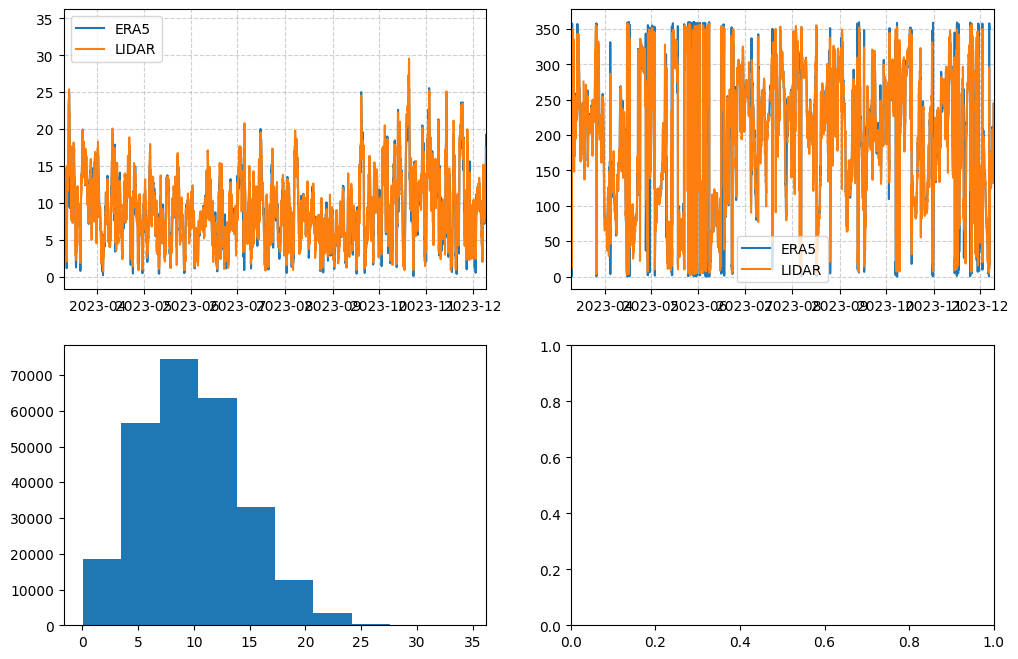

In [6]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

scaler=StandardScaler()


# load in the wind velocity data and clean duplicates etc.:
data_ERA5 = pd.read_csv(f'reanalysis.csv',parse_dates=['Unnamed: 0'])
                # preprocessed ERA5 data
data_ERA5.rename(columns={ data_ERA5.columns[0]: "Time" }, inplace = True)
                # rename the first column to be the 'time' column
data_ERA5.drop_duplicates(subset='Time', inplace=True)


data_LIDAR = pd.read_csv(f'measurements/lidar.csv',parse_dates=['Unnamed: 0'])
                # data from the LIDAR measurement
data_LIDAR.rename(columns={ data_LIDAR.columns[0]: "Time" }, inplace = True)
                # rename the first column to be the 'time' column
data_LIDAR.drop_duplicates(subset='Time', inplace=True)


# Resample the LIDAR data to 1h intervals

data_LIDAR = data_LIDAR.resample('h', on='Time').mean()


# create a merged dataframe containing the ERA5 and the LIDAR data

data_mrgd = pd.merge(data_LIDAR, data_ERA5, how='right', on='Time')

data_mrgd['Time'] = pd.to_datetime(data_mrgd['Time'])

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax = ax.flatten()

ax[0].plot(data_mrgd['Time'], data_mrgd['WS100'])
ax[0].plot(data_mrgd['Time'], data_mrgd['WS-99.2'])

ax[1].plot(data_mrgd['Time'], data_mrgd['WD100'])
ax[1].plot(data_mrgd['Time'], data_mrgd['WD-99.2'])

ax[2].hist(data_mrgd['WS100'])

for axs in ax[0:2]:
    axs.set_xlim(data_LIDAR.index[0], data_LIDAR.index[-1])
    axs.legend(['ERA5', 'LIDAR'])
    axs.grid(True, linestyle="--", alpha=0.6)